In [21]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

In [22]:
image_paths = [
    'D:\\owd1\\Documents\\GitHub-REPO\\Senior-project\\Docs\\Row_Data\\RUH\\RUH-24-01-30-Selected-Bands.tif'
    ]

In [23]:
# Function to normalize array based on a given min and max value for display
def manual_normalize(array, min_val, max_val):
    array = np.clip(array, min_val, max_val)  # Clip to the specified range
    return (array - min_val) / (max_val - min_val)  # Normalize to [0, 1]


In [24]:
# Function to read a band from the dataset and convert it to float32
def read_band(ds, band_number):
    band = ds.GetRasterBand(band_number).ReadAsArray().astype(np.float32)
    return band

In [25]:
# Function to plot a single band
def plot_band(array, title='Band Image', cmap=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(array, cmap=cmap)
    plt.title(title)
    plt.axis('off')  # Turn off the axis
    plt.show()

In [26]:
# Function to plot all bands
def plot_all_bands(ds, num_bands):
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Adjust the size as needed
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for i in range(num_bands):
        band = ds.GetRasterBand(i + 1)  # Bands are 1-indexed in GDAL
        array = band.ReadAsArray()

        ax = axes[i]
        im = ax.imshow(array)
        ax.set_title(f'Band {i + 1}')
        ax.axis('off')

        # Optionally, you can add a colorbar for each subplot
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

In [27]:
# Function to create an RGB composite image
def plot_rgb(ds, min_display_val, max_display_val):
    band_red = read_band(ds, 4)
    band_green = read_band(ds, 3)
    band_blue = read_band(ds, 2)

    n_band_red = manual_normalize(band_red, min_display_val, max_display_val)
    n_band_green = manual_normalize(band_green, min_display_val, max_display_val)
    n_band_blue = manual_normalize(band_blue, min_display_val, max_display_val)

    rgb = np.dstack((n_band_red, n_band_green, n_band_blue))
    plot_band(rgb, 'RGB Composite Image with Manual Normalization')


In [28]:
# Function to calculate and plot NDVI
def plot_ndvi(ds):
    red = read_band(ds, 4)  # Assuming Band 4 is Red
    nir = read_band(ds, 8)  # Assuming Band 8 is NIR
    ndvi = (nir - red) / (nir + red)
    plot_band(ndvi, 'NDVI Image', cmap='RdYlGn')

# Main code to open image and call plotting functions

Number of bands in the image: 4


C:\Users\owd1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


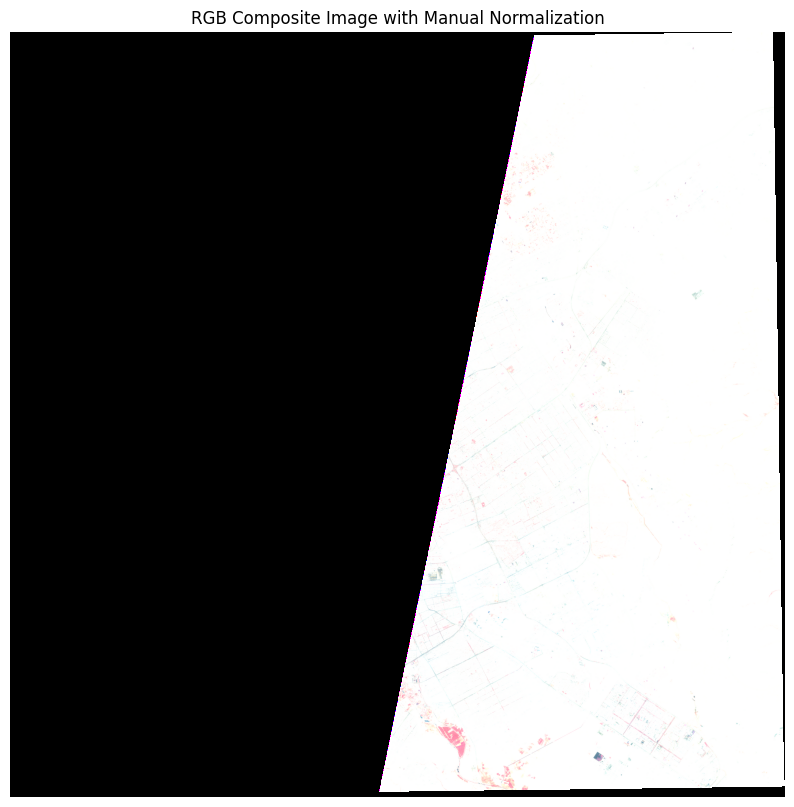

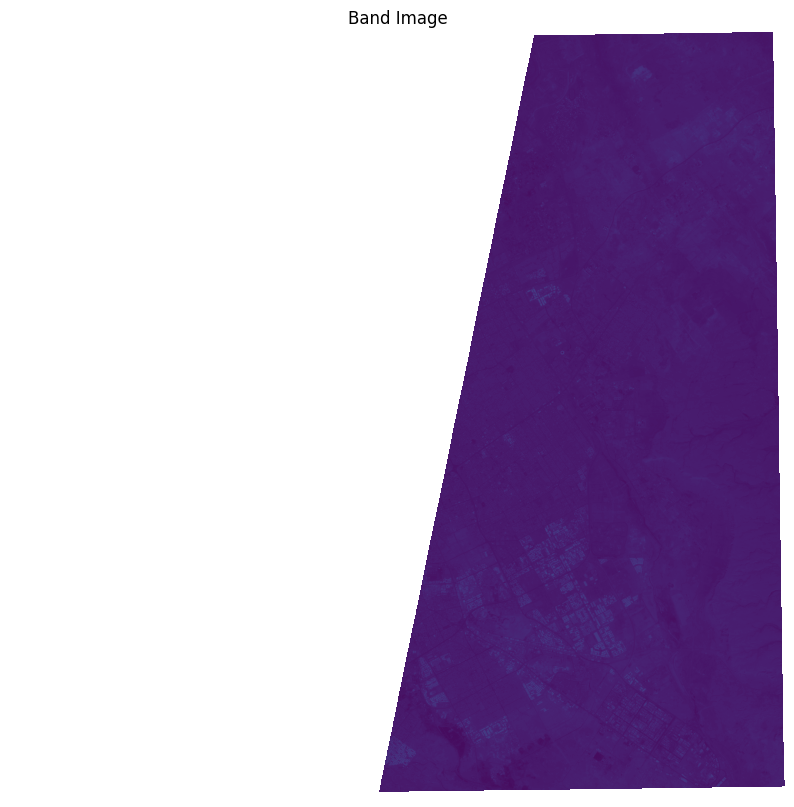

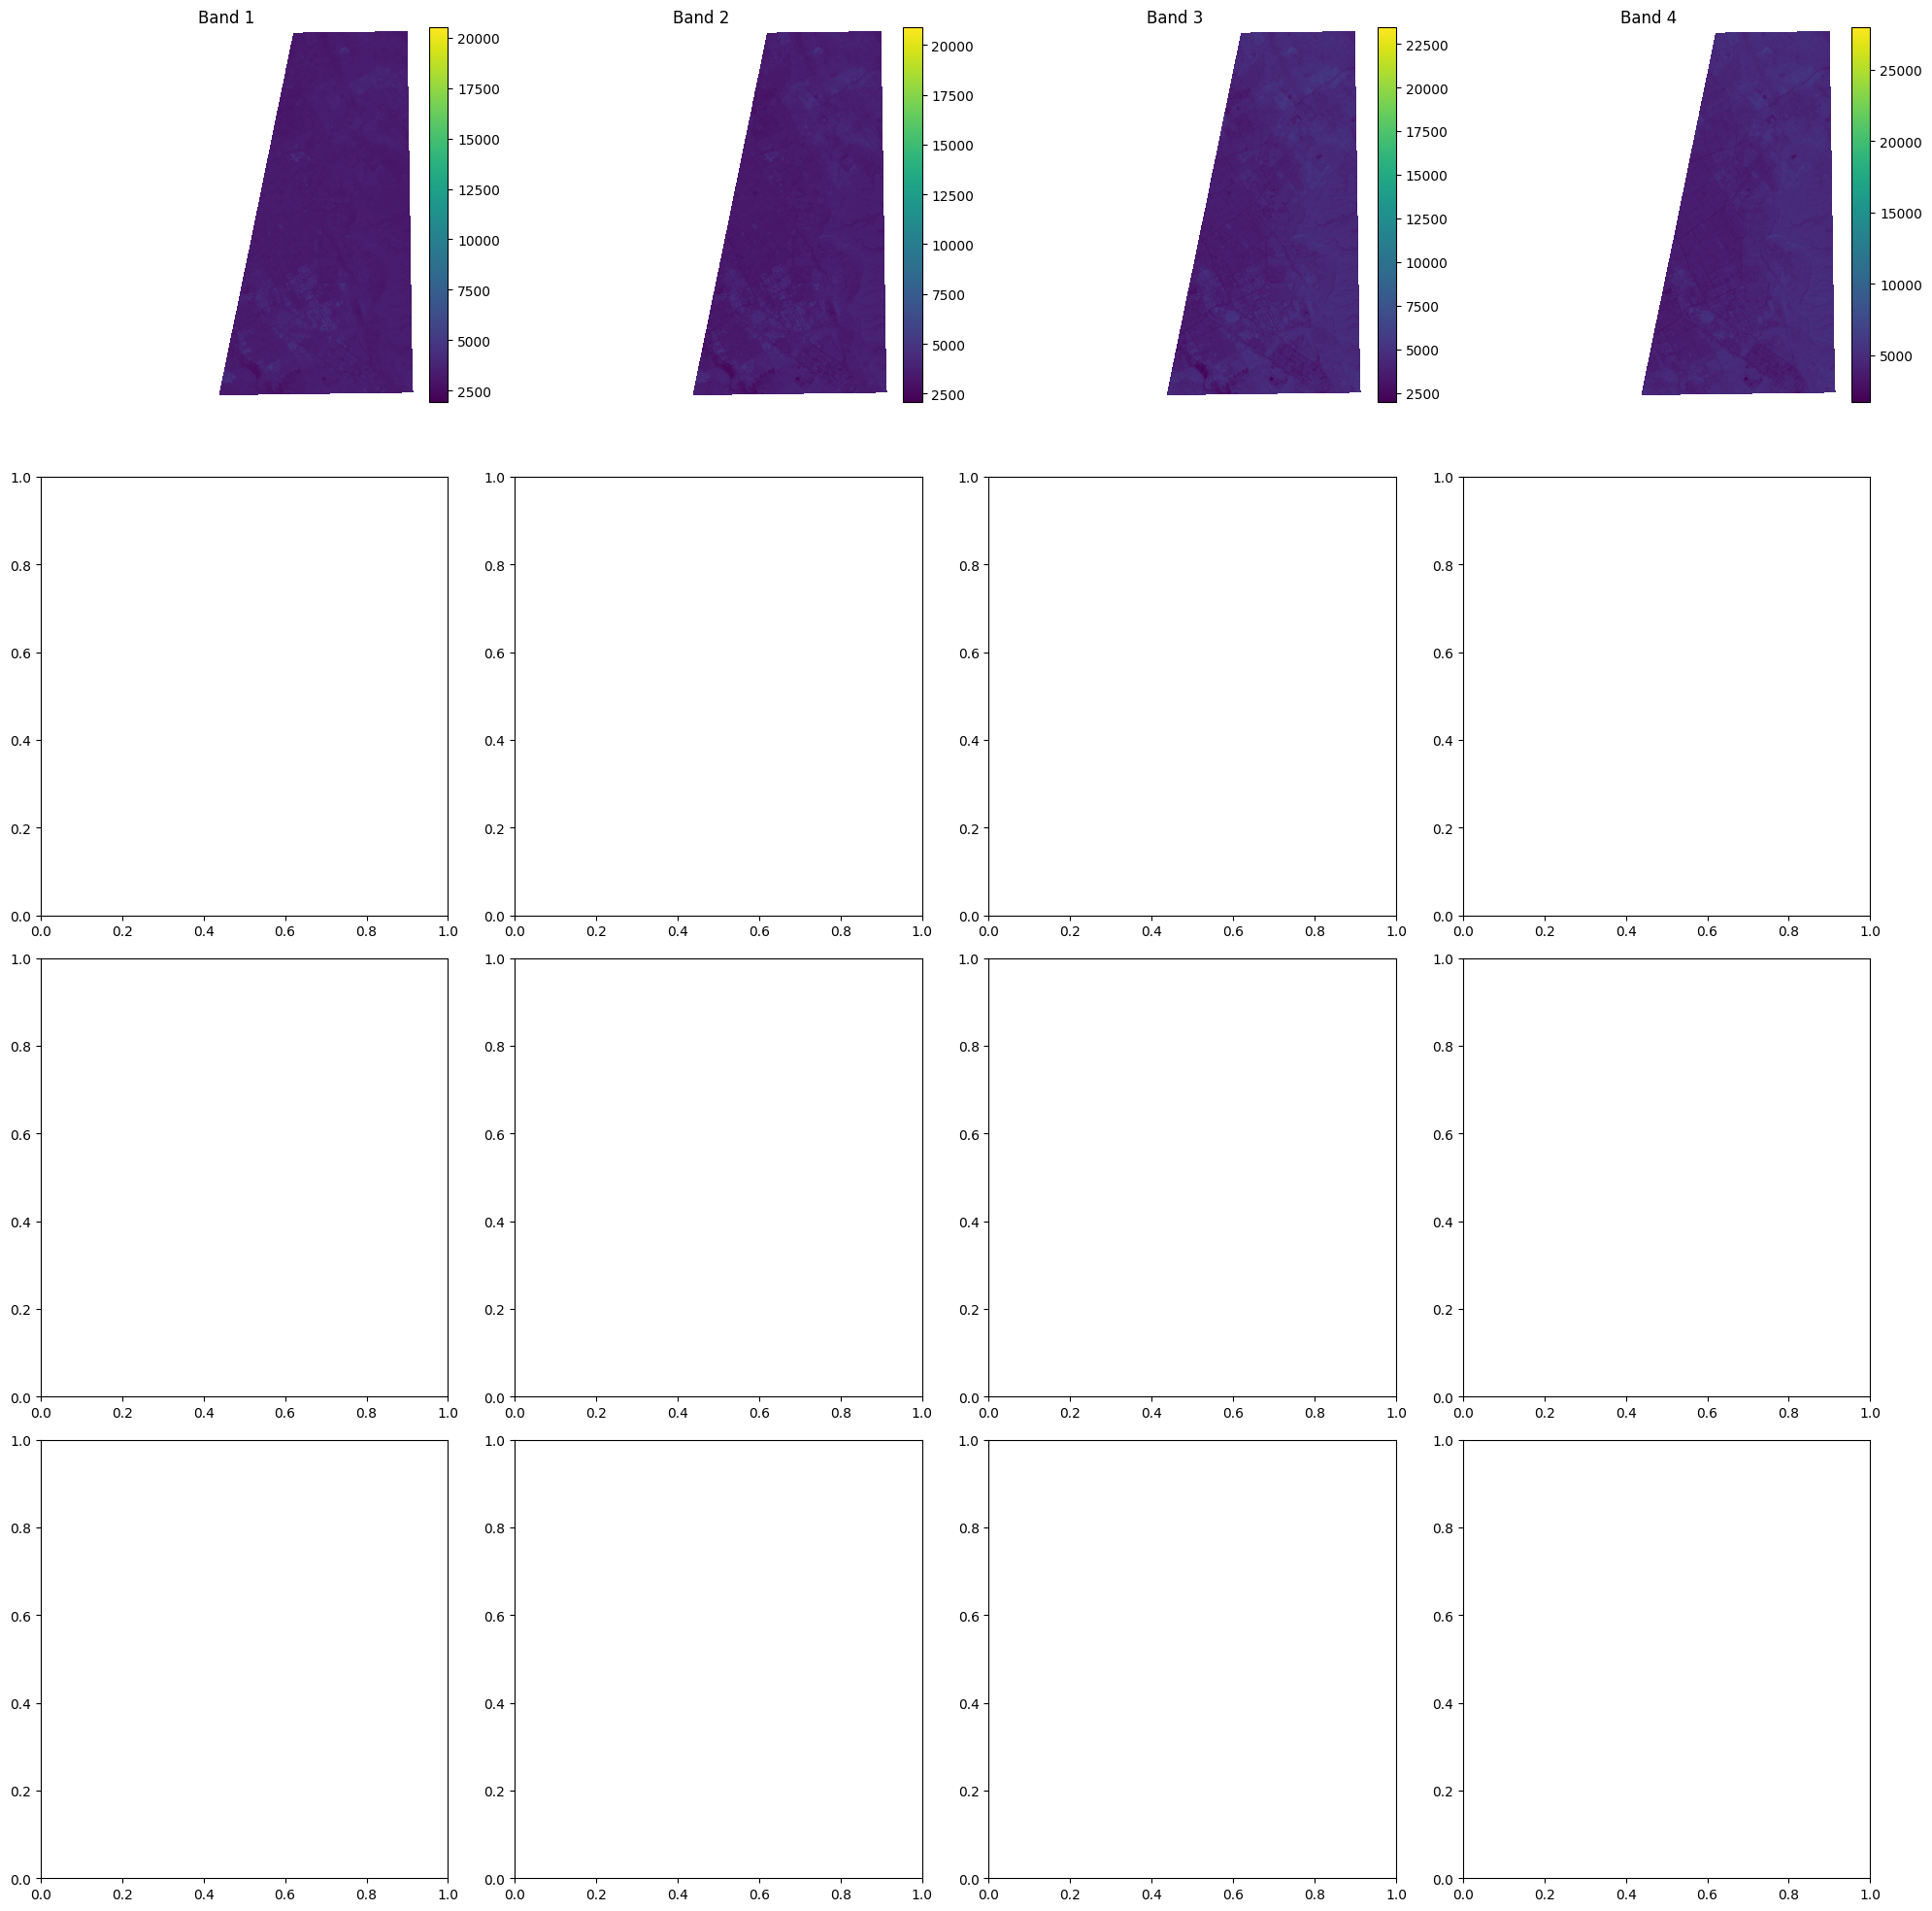

AttributeError: 'NoneType' object has no attribute 'ReadAsArray'

In [29]:
for image_path in image_paths:
    ds = gdal.Open(image_path)
    num_bands = ds.RasterCount
    print(f'Number of bands in the image: {num_bands}')
    
    # Plot RGB composite image
    min_display_val = 1000  # Example value, adjust based on your data
    max_display_val = 3000  # Example value, adjust based on your data
    plot_rgb(ds, min_display_val, max_display_val)

    # Plot a single band
    band_array = read_band(ds, 1)
    plot_band(band_array)

    # Plot all bands
    plot_all_bands(ds, num_bands)



    # Plot NDVI
    plot_ndvi(ds)